 ## Import Libraries

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load Data


In [94]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [95]:
df = pd.read_csv(url)

## Data Overview

In [96]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
437,2014,GMC,SAVANA 1500 CARGO AWD,VAN - CARGO,5.3,8,A4,X,18.3,14.2,16.5,17,380
618,2014,KIA,RONDO,STATION WAGON - MID-SIZE,2.0,4,A6,X,10.5,7.5,9.2,31,212
193,2014,CHEVROLET,CAMARO ZL1,COMPACT,6.2,8,AS6,Z,19.7,12.9,16.6,17,382
632,2014,KIA,SPORTAGE AWD,SUV - SMALL,2.4,4,A6,X,12.0,9.1,10.7,26,246
42,2014,AUDI,Q7,SUV - STANDARD,3.0,6,AS8,Z,15.1,10.9,13.2,21,304


In [97]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [98]:
df.shape

(1067, 13)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [100]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [101]:
df.isnull().sum()

,0
MODELYEAR,0
MAKE,0
MODEL,0
VEHICLECLASS,0
ENGINESIZE,0
CYLINDERS,0
TRANSMISSION,0
FUELTYPE,0
FUELCONSUMPTION_CITY,0
FUELCONSUMPTION_HWY,0


In [102]:
df.duplicated().sum()

np.int64(0)

##Feature Selection

Select a few features that might be indicative of CO2 emission to explore more.


In [103]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
1001,4.0,6,13.3,306
92,2.0,4,8.7,200
236,2.4,4,10.2,235
120,4.4,8,14.7,338
910,5.7,8,13.6,313
884,3.8,6,11.9,274
136,2.0,4,8.7,200
825,1.2,3,6.4,147
197,1.4,4,7.8,179


## Data Visualization (Feature Relationships)
Consider the histograms for each of these features.


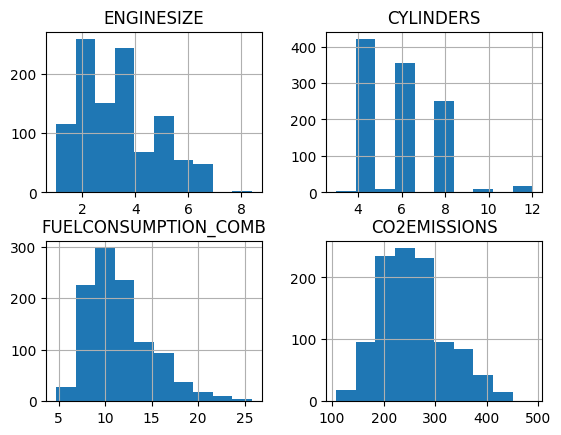

In [104]:
viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

 Visualizing the relationship between fuel consumption and CO2 emissions with a scatter plot


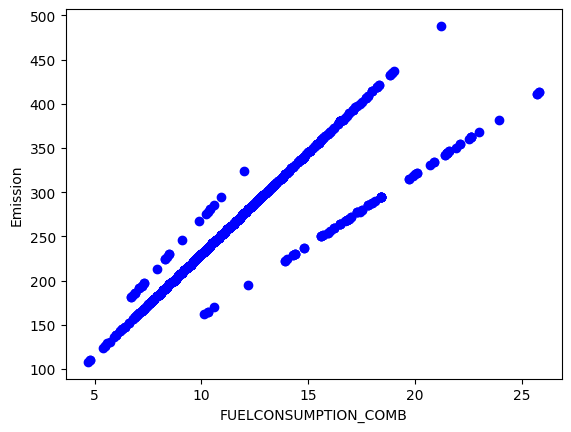

In [105]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

Scatter plot showing the relationship between engine size and CO2 emissions


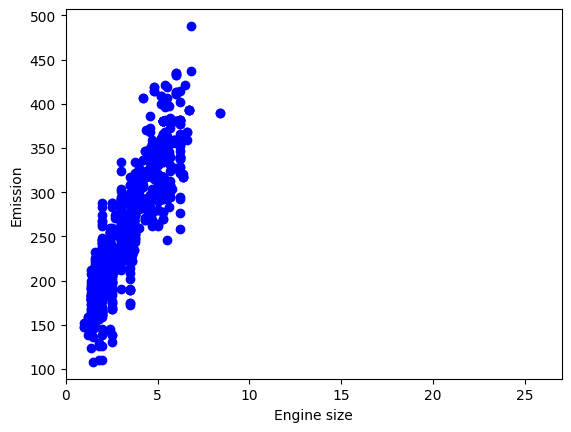

In [106]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS , color='blue')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.xlim(0,27)
plt.show()

Plot __CYLINDER__ against CO2 Emission, to see how linear their relationship is.


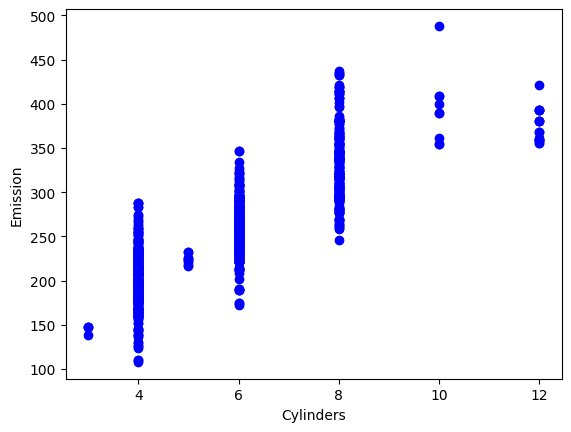

In [107]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS , color='blue')
plt.xlabel('Cylinders')
plt.ylabel('Emission')
plt.show()


## Model 1: Using Engine Size
Prepare input (X) and output (y) arrays

In [108]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

Split data into 80% training and 20% testing sets

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2 , random_state=43)

### Build a simple linear regression model

In [110]:
# create a model object
regressor = linear_model.LinearRegression()

# train the model on the training data
# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features).
# So we need to reshape it. We can let it infer the number of observations using '-1'.
regressor.fit(X_train.reshape(-1, 1), y_train)

# Print the coefficients
print ('Coefficients: ', regressor.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',regressor.intercept_)

Coefficients:  39.314113923373476
Intercept:  123.80928254931413


### Visualize model outputs


Text(0, 0.5, 'Emission')

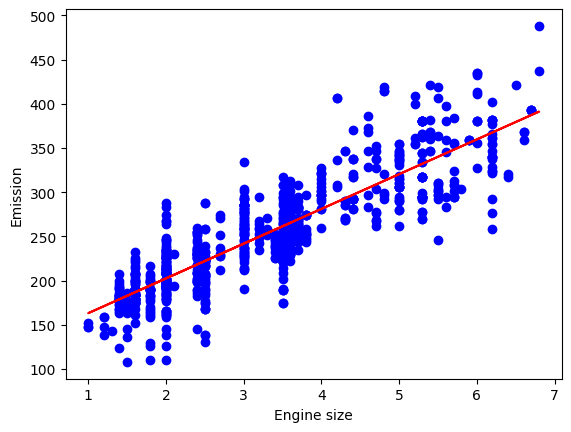

In [111]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Evaluation (Engine Size)

In [112]:
# Use the predict method to make test predictions
y_test_ = regressor.predict(X_test.reshape(-1,1))

# Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))

Mean absolute error: 23.27
Mean squared error: 902.11
Root mean squared error: 30.04
R2-score: 0.78


Plot the regression model result over the test data instead of the training data. Visually evaluate whether the result is good.


Text(0.5, 1.0, 'Prediction Before Log Transformation')

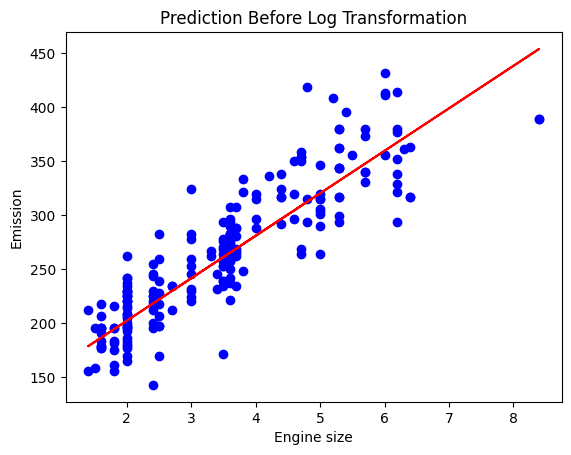

In [113]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, regressor.coef_ * X_test + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("Prediction Before Log Transformation")

## Model 2: Using Fuel Consumption


In [114]:
X = cdf.FUELCONSUMPTION_COMB.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### 3.  Train a linear regression model using the training data you created.
Remember to transform your 1D feature into a 2D array.


In [115]:
regr = linear_model.LinearRegression()
regr.fit(X_train.reshape(-1, 1), y_train)


LinearRegression()

## Evaluation (Fuel Consumption Model)

In [116]:
y_test_ = regr.predict(X_test.reshape(-1,1))

In [117]:
# Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))

Mean absolute error: 20.44
Mean squared error: 797.43
Root mean squared error: 28.24
R2-score: 0.81


## Log Transformation

In [118]:
#Apply logarithmic transformation
X = np.log(cdf['FUELCONSUMPTION_COMB'].to_numpy())

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
# Reshape X to 2D
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluation (Log-Transformed Model)

In [120]:
# Predict on test set
y_pred = model.predict(X_test)

In [127]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print("Evaluation with log-transformed feature:")
print("Mean Absolute Error: %.2f" % mae)
print("Mean Squared Error: %.2f" % mse)
print("Root Mean Squared Error: %.2f" % rmse)
print("R2-score: %.2f" % r2)


Evaluation with log-transformed feature:
Mean Absolute Error: 14.52
Mean Squared Error: 579.89
Root Mean Squared Error: 24.08
R2-score: 0.86


Text(0.5, 1.0, 'Prediction After Log Transformation')

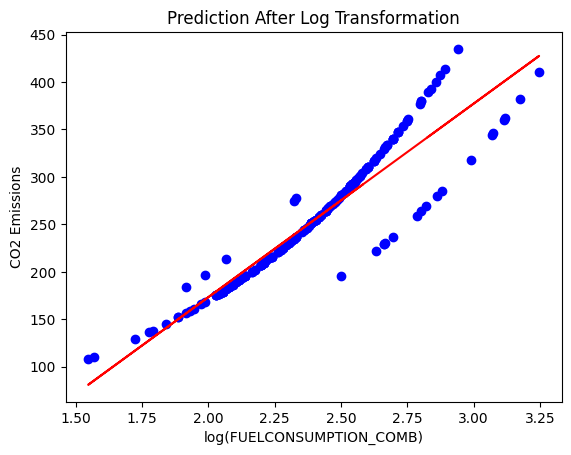

In [126]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel("log(FUELCONSUMPTION_COMB)")
plt.ylabel("CO2 Emissions")
plt.title("Prediction After Log Transformation")

## Cross-Validation

In [125]:
# Apply logarithmic transformation to the fuel consumption feature
X = np.log(cdf['FUELCONSUMPTION_COMB'].to_numpy()).reshape(-1, 1)
y = cdf['CO2EMISSIONS'].to_numpy()

# Create a linear regression model
model = LinearRegression()

# Perform 5-fold cross-validation using R² as the evaluation metric
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print R² scores for each fold and the average score
print("R² scores for each fold:", scores)
print("Average R²:", np.mean(scores))


R² scores for each fold: [0.84940876 0.70532689 0.83494562 0.90821812 0.90863365]
Average R²: 0.841306608401276
